<a href="https://colab.research.google.com/github/Shagun20/CSE508_Winter2023_A3_112/blob/main/IR_3_A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#upload the twitter-combined.txt file
from google.colab import drive

drive.mount('/content/gdrive')


Mounted at /content/gdrive


In [ ]:
import pandas as pd
filep= '/content/gdrive/My Drive/IR_AssnDatasets_Sem6/Wiki-Vote.txt'



In [ ]:
# display DataFrame
with open(filep) as f:
    edges = [tuple(map(int, line.strip().split())) for line in f if line[0] != '#']

In [ ]:
edges[-1]

(8274, 8275)

In [ ]:
nodes=set()
for i in range(len(edges)):
    nodes.add(edges[i][0])
    nodes.add(edges[i][1])


In [ ]:
len(edges)

103689

In [ ]:
len(nodes)

7115

In [ ]:
#initialise the adjacency matrix
adj_matrix = [[0] * len(nodes) for _ in range(len(nodes))]


In [ ]:
#create a map from given userids to an index number of the node
#reverse map will reverse map the index number of the node back to the user ids. 

map={}
reverse_map={}
count=0
for id in nodes:
  map[id]=count
  reverse_map[count]=id
  count+=1


In [ ]:
for n1, n2 in edges:
    adj_matrix[map[n1]][map[n2]] = 1

In [ ]:
#adj_matrix stores the adjacency matrix with mapped vertices as indices

In [ ]:
#each list in the edge list represents the neighbours of the nodes represented by the index of the list
#appending the second vertex to the list corresponding to the edge 

edge_list={}
for edge in edges:
  src=map[edge[0]]
  dest=map[edge[1]]

  if src not in edge_list:
    edge_list[src]=[]

  edge_list[src].append(dest)



In [ ]:
len(edge_list)

6110

In [ ]:
edge_list

{27: [1299, 3064, 4680, 4919, 6484],
 0: [25,
  27,
  36,
  51,
  102,
  144,
  169,
  173,
  203,
  257,
  268,
  282,
  330,
  331,
  350,
  515,
  529,
  532,
  534,
  538,
  551,
  558,
  7100],
 22: [0,
  3,
  5,
  16,
  20,
  25,
  26,
  27,
  30,
  32,
  47,
  51,
  52,
  70,
  75,
  81,
  89,
  121,
  144,
  146,
  173,
  181,
  203,
  212,
  214,
  233,
  239,
  242,
  244,
  248,
  257,
  258,
  263,
  264,
  268,
  281,
  282,
  284,
  288,
  290,
  292,
  304,
  307,
  321,
  330,
  331,
  337,
  339,
  342,
  349,
  350,
  352,
  356,
  358,
  384,
  392,
  398,
  404,
  415,
  449,
  467,
  493,
  497,
  508,
  538,
  540,
  548,
  551,
  558,
  589,
  594,
  603,
  607,
  610,
  615,
  617,
  636,
  645,
  662,
  678,
  693,
  786,
  792,
  820,
  880,
  915,
  1036,
  3415,
  7099,
  7101],
 1: [5,
  7,
  25,
  27,
  35,
  52,
  53,
  70,
  124,
  133,
  140,
  143,
  144,
  203,
  219,
  230,
  264,
  281,
  323,
  342,
  349,
  392,
  508,
  553,
  558,
  589,
  594,


In [ ]:
#Avg In-degree and Average Out-degree
# If we want to determine the in-degree of a vertex, for this, we have to count the number of edges that ends at the vertex

n = len(nodes)
in_deg = [0] * n
out_deg= [0] * n

for i in range(n):
    if i in edge_list:
      out_deg[i] = len(edge_list[i])
    for j in range(n):
        in_deg[j] += adj_matrix[i][j]

avg_in=sum(in_deg)/len(nodes)
avg_out=sum(out_deg)/len(nodes)



In [ ]:
print("Average In Degree: ", avg_in)
print("Average Out Degree: ", avg_out)

Average In Degree:  14.573295853829936
Average Out Degree:  14.573295853829936


In [ ]:
len(out_deg)

7115

In [ ]:
# the average of the in-degree equal to the average of the out-degree in a directed graph

In [ ]:
#node with maximum in degree
max=0
max2=0
for i in range(len(in_deg)):
  if in_deg[i]>max:
    max=in_deg[i]
    node_in=i

#node with max out deg
  if out_deg[i]>max2:
    max2=out_deg[i]
    node_out=i

  


In [ ]:
print("The userID with max in-deg: ", reverse_map[node_in])
print("The userID with max out-deg: ", reverse_map[node_out])

The userID with max in-deg:  4037
The userID with max out-deg:  2565


In [ ]:
#The density of the network
#density = number of edges / maximum possible number of edges
#max_edges=n*(n-1)

max_edges= (len(nodes)*(len(nodes)-1))
density= len(edges)/max_edges


In [ ]:
len(nodes)

7115

In [ ]:
print("The density of the network is ", density)

The density of the network is  0.0020485375110809584


In [ ]:
#Plot degree distribution of the network (in case of a directed graph, plot in-degree and
#out-degree separately)

# nodes=[]
# in_nodes=[]

# 
# #store the in_degree corresponding to a node
# in_degrees={}
# for ind in in_deg:
#   if ind in in_degrees:
#     in_degrees[ind]+=1

#   else:
#      in_degrees[ind]=0


# for i in sorted(in_degrees.keys()):
#   nodes.append(i)
#   in_nodes.append(in_degrees[i])


# # plot in-degree distribution
# plt.plot(in_nodes, nodes)
# plt.title("In-degree distribution")
# plt.xlabel("In-Degree")
# plt.ylabel("Number of Nodes")
# plt.xlim( 0,100 )

# plt.show()
  



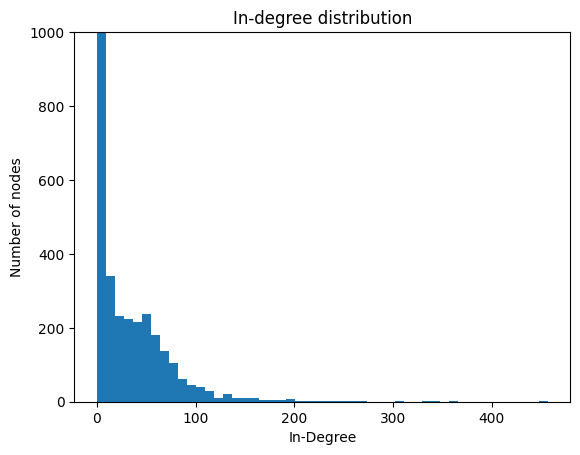

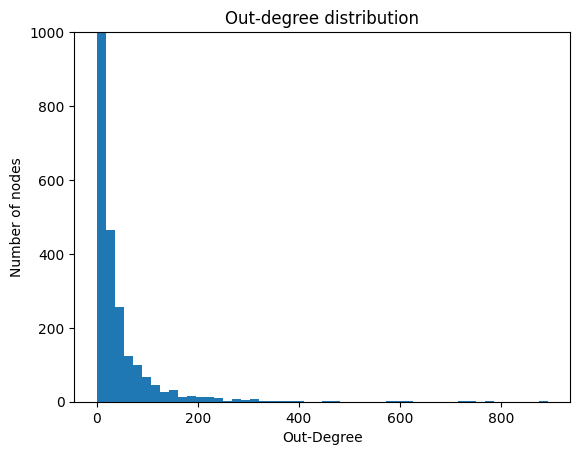

In [ ]:
# out_nodes=[]

# out_degrees={}
# for i in range(len(out_deg)):
#   out_degrees[reverse_map[i]]=out_deg[i]

# for i in sorted(out_degrees.keys()):
#   out_nodes.append(out_degrees[i])

# # plot out-degree distribution
# plt.plot(nodes, out_nodes)
# plt.title("Out-degree distribution")
# plt.xlabel("Node")
# plt.ylabel("Out-Degree")
# plt.show()

import matplotlib.pyplot as plt

# Plot the in-degree distribution
plt.hist(in_deg, bins=50)
plt.title("In-degree distribution")
plt.xlabel("In-Degree")
plt.ylabel("Number of nodes")
plt.ylim(0,1000)

plt.show()

# Plot the out-degree distribution
plt.hist(out_deg, bins=50)
plt.title("Out-degree distribution")
plt.xlabel("Out-Degree")
plt.ylabel("Number of nodes")
plt.ylim(0,1000)
plt.show()

A histogram is a common way to visualize the degree distribution of a network because it allows us to easily see the distribution of node degrees in the network. In a histogram, the x-axis represents the range of degrees, and the y-axis represents the number of nodes with that degree. 

In [ ]:
def common(list1, list2):
  sum=0
  for i in list1:
    if i in list2:
      sum+=1
  return sum

In [ ]:
# calculate local clustering coefficient for each node
#lcc for a node can be calculated by dividing the number of edges between node's neighbours
#divided by total number of possible edges that could have been 

# triangles = 0
#     possible_triangles = len(neighbors[node]) * (len(neighbors[node]) - 1) // 2
#     for neighbor in neighbors[node]:
#         common_neighbors = neighbors[node] & neighbors[neighbor]
#         triangles += len(common_neighbors)
#     if possible_triangles > 0:
#         cc[node] = triangles / possible_triangles
#     else:
#         cc[node] = 0

lcc = {}
for node in nodes:
  #extract the neighbours from edge list
  cc=0
  neighbours=[]
  if node in edge_list:
    neighbours=edge_list[node]
  max_possible=len(neighbours)*(len(neighbours)-1)
  if max_possible==0:
    lcc[node]=0
    continue

  #now for each neighbour see if any other neighbour is contained in the neigbour list of that neihbour
  
  for neighbour in neighbours:
    #find the common between the two lists 
    if neighbour in edge_list:
      cc+=common(edge_list[neighbour], neighbours)

  lcc[node]=cc/max_possible
    
    


  


    

In [ ]:
lcc

{3: 0.030659391432531737,
 4: 0.09239130434782608,
 5: 0.04319713435735535,
 6: 0.05416666666666667,
 7: 0.06757865937072503,
 8: 0.02612160941473519,
 9: 0.051201923076923075,
 10: 0.11818181818181818,
 11: 0.030740568234746156,
 12: 0.06693877551020408,
 13: 0.11904761904761904,
 14: 0.08787878787878788,
 15: 0.12878787878787878,
 16: 0.1106612685560054,
 17: 0.03306307860387557,
 18: 0.030526315789473683,
 19: 0.0,
 20: 0.05368382080710848,
 21: 0.04190308073803219,
 22: 0.10074906367041199,
 23: 0.060582306830907054,
 24: 0.03805086390992041,
 25: 0.05639097744360902,
 26: 0.03923937360178971,
 27: 0.05,
 28: 0.05238095238095238,
 29: 0.0,
 30: 0.09239130434782608,
 31: 0.45,
 32: 0.03461538461538462,
 33: 0.049471755487115514,
 34: 0.06842105263157895,
 35: 0.1043956043956044,
 36: 0.13048780487804879,
 37: 0.09090909090909091,
 38: 0.07241379310344828,
 39: 0.03677221654749745,
 40: 0.08333333333333333,
 41: 0.0354122621564482,
 42: 0.16071428571428573,
 43: 0.049678550555230856,

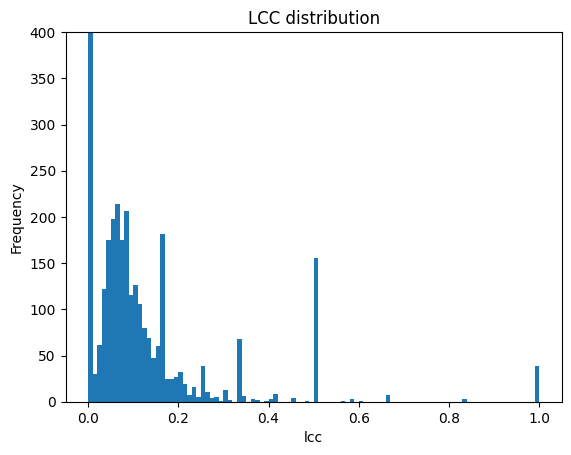

In [ ]:
#plot the lcc distribution

# Plot the in-degree distribution
plt.hist(list(lcc.values()), bins=100)
plt.title("LCC distribution")
plt.xlabel("lcc")
plt.ylabel("Frequency")
plt.ylim(0,400)
plt.show()

